CLASSIFYING THE EARTHQUAKE DAMAGE WHETHER THERE IS ONE OR NOT

In [1]:
# importing the libraries we are going to use
import os, shutil
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

ADRESSING THE TEST, VALIDATION AND TRAINING FOLDERS

In [2]:
original_dataset_dir = "archive/"
train_dir = "archive/train_another"
validation_dir = "archive/validation_another"
test_dir = "archive/test_another"
train_damage_dir = "archive/train_another/damage"
train_no_damage_dir = "archive/train_another/no_damage" 
validation_damage_dir = "archive/validation_another/damage"
validation_no_damage_dir = "archive/validation_another/no_damage"
test_damage_dir = "archive/test_another/damage"
test_no_damage_dir = "archive/test_another/no_damage"

# i did not create new folders using "os.path.join" and "os.mkdir" functions .
# My dataset was already classified and i adressed them directly to variables as seen above

PRINTING NUMBER OF DATAS FOR VALIDATION, TEST AND TRAINING

In [3]:
print("Total training damage images : " , 
      len(os.listdir(train_damage_dir)))
print("Total training no damage images : ", 
      len(os.listdir(train_no_damage_dir)))
print("Total Validation damage images : " , 
      len(os.listdir(validation_damage_dir)))
print("Total Validation no damage images : " , 
      len(os.listdir(validation_no_damage_dir)))
print("Total Test damage images : " , 
      len(os.listdir(test_damage_dir)))
print("Total Test no damage images : " , 
      len(os.listdir(test_no_damage_dir)))


Total training damage images :  5000
Total training no damage images :  5000
Total Validation damage images :  1000
Total Validation no damage images :  1000
Total Test damage images :  8000
Total Test no damage images :  1000


MY PURPOSE IS TO FIND WHETER A AREA IS DAMAGED OR NON DAMAGED

 SO I HAVE TWO OUTCOMES WHICH MAKES MY MINIMUM SUCCESS RATE (5000/10000)*100 = 50              MINUMUM 50% SUCCESS RATE

CREATING MY OWN CNN MODEL

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32 , (3,3) , activation="relu" ,input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64 , (3,3) , activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128 , (3,3) , activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128 , (3,3) , activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512 , activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

COMPILING MY CNN MODEL

In [5]:
model.compile(loss="binary_crossentropy",
                optimizer=optimizers.RMSprop(lr=0.001),
                metrics=["acc"])

NORMALIZATION OF IMAGES

In [6]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir , target_size = (150,150) , 
    batch_size = 20 , class_mode = "binary")

validation_generator = test_datagen.flow_from_directory(
    validation_dir , target_size = (150,150) ,
    batch_size = 20 , class_mode = "binary" )

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [7]:
for data_batch , labels_batch in train_generator : 
    print("data batch shape : " , data_batch.shape)
    print("labels batch shape : " , labels_batch.shape)
    break

data batch shape :  (20, 150, 150, 3)
labels batch shape :  (20,)


In [8]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=40,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/40


C:\Users\ardac\AppData\Local\Temp\ipykernel_3420\2954098537.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 23s 230ms/step - loss: 0.7411 - acc: 0.5755 - val_loss: 0.6339 - val_acc: 0.7890
Epoch 2/40
100/100 [==============================] - 21s 213ms/step - loss: 0.5390 - acc: 0.7505 - val_loss: 0.3628 - val_acc: 0.8490
Epoch 3/40
100/100 [==============================] - 22s 217ms/step - loss: 0.3831 - acc: 0.8420 - val_loss: 0.3537 - val_acc: 0.8710
Epoch 4/40
100/100 [==============================] - 21s 207ms/step - loss: 0.3197 - acc: 0.8575 - val_loss: 0.2120 - val_acc: 0.9140
Epoch 5/40
100/100 [==============================] - 21s 207ms/step - loss: 0.2902 - acc: 0.8770 - val_loss: 0.2032 - val_acc: 0.9190
Epoch 6/40
100/100 [==============================] - 21s 207ms/step - loss: 0.2335 - acc: 0.9045 - val_loss: 0.2796 - val_acc: 0.8910
Epoch 7/40
100/100 [==============================] - 21s 205ms/step - loss: 0.2356 - acc: 0.9055 - val_loss: 0.5432 - val_acc: 0.6200
Epoch 8/40
100/100 [==============================] - 21s 206ms/st

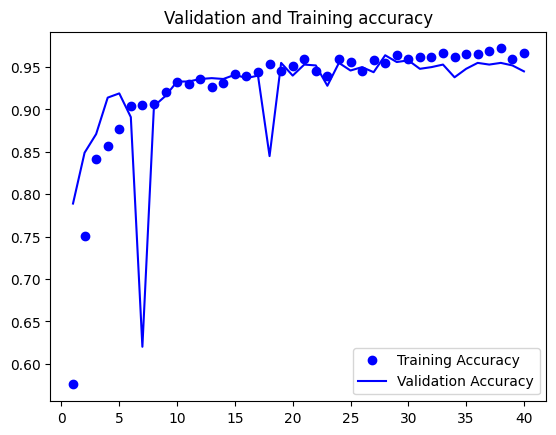

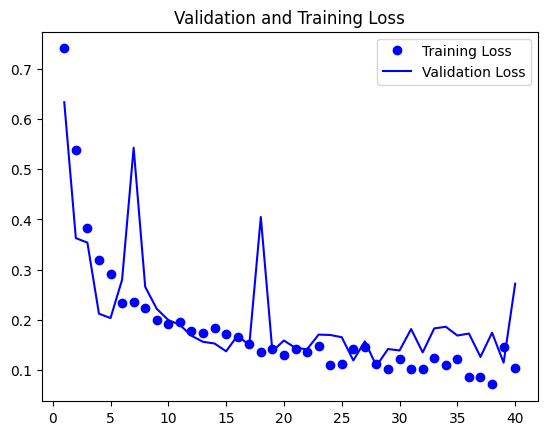

In [9]:
import matplotlib.pyplot as plt

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1 , len(acc) + 1)

plt.plot(epochs , acc, "bo" , label = "Training Accuracy")
plt.plot(epochs , val_acc , "b" , label = "Validation Accuracy")
plt.title("Validation and Training accuracy")
plt.legend()
plt.figure()

plt.plot(epochs , loss , "bo" , label = "Training Loss")
plt.plot(epochs , val_loss , "b" , label = "Validation Loss")
plt.title("Validation and Training Loss")
plt.legend()

plt.show()

MY OPTIMUM EPOCH NUMBER IS 28

In [11]:
test_generator = test_datagen.flow_from_directory(
    test_dir , target_size=(150,150) , 
    batch_size=20 , class_mode=("binary") )

test_loss , test_acc = model.evaluate(test_generator , steps = 5)
print("Test Accuracy : " , test_acc)

Found 9000 images belonging to 2 classes.
5/5 [==============================] - 0s 44ms/step - loss: 0.1857 - acc: 0.9400
Test Accuracy :  0.9399999976158142


COMBINING UP VALIDATION AND TRAINING DATASETS

In [12]:
train_validation_dir = "train_validation"
os.mkdir(train_validation_dir)

no_damage = os.path.join(train_validation_dir , "no_damage")
os.mkdir(no_damage)

damage = os.path.join(train_validation_dir , "damage")
os.mkdir(damage)

In [13]:
fnames = ["traindamage ({}).jpeg" .format(i) for i in range(1,5001)]
for fname in fnames : 
    src = os.path.join(train_damage_dir , fname)
    dst = os.path.join("train_validation/damage" , fname)
    shutil.copyfile(src , dst)
fnames = ["trainnodamage ({}).jpeg" .format(i) for i in range(1,5001)]
for fname in fnames : 
    src = os.path.join(train_no_damage_dir , fname)
    dst = os.path.join("train_validation/no_damage" , fname)
    shutil.copyfile(src , dst)
fnames = ["valdamage ({}).jpeg" .format(i) for i in range(1,1001)]
for fname in fnames : 
    src = os.path.join(validation_damage_dir , fname)
    dst = os.path.join("train_validation/damage" , fname)
    shutil.copyfile(src , dst)
fnames = ["valnodamage ({}).jpeg" .format(i) for i in range(1,1001)]
for fname in fnames : 
    src = os.path.join(validation_no_damage_dir , fname)
    dst = os.path.join("train_validation/no_damage" , fname)
    shutil.copyfile(src , dst)

In [73]:
model = models.Sequential()
model.add(layers.Conv2D(32 , (3,3) , activation="relu" ,input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64 , (3,3) , activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128 , (3,3) , activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128 , (3,3) , activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128 , (3,3) , activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128 , activation = "relu"))
model.add(layers.Dense(64 , activation = "relu"))
model.add(layers.Dense(32 , activation = "relu"))
model.add(layers.Dense(1 , activation = "sigmoid"))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 17, 17, 128)      

In [74]:
model.compile(loss = "binary_crossentropy" ,
              optimizer = optimizers.RMSprop(lr=0.001) , 
              metrics = ["acc"])

In [75]:
train_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(
    train_validation_dir , target_size = (150,150) ,
    batch_size = 20 , class_mode = "binary")

Found 12000 images belonging to 2 classes.


In [76]:
history = model.fit(
    train_generator , 
    steps_per_epoch = 120 , 
    epochs = 28 ,
    validation_data = validation_generator, 
    validation_steps = 60 
    )

Epoch 1/28
120/120 [==============================] - 28s 224ms/step - loss: 0.6967 - acc: 0.5246 - val_loss: 0.6723 - val_acc: 0.6750
Epoch 2/28
120/120 [==============================] - 26s 220ms/step - loss: 0.5467 - acc: 0.7325 - val_loss: 0.4589 - val_acc: 0.8108
Epoch 3/28
120/120 [==============================] - 26s 217ms/step - loss: 0.4100 - acc: 0.8208 - val_loss: 0.3634 - val_acc: 0.8558
Epoch 4/28
120/120 [==============================] - 26s 219ms/step - loss: 0.3604 - acc: 0.8500 - val_loss: 0.3123 - val_acc: 0.8708
Epoch 5/28
120/120 [==============================] - 27s 226ms/step - loss: 0.2733 - acc: 0.8712 - val_loss: 0.3506 - val_acc: 0.8750
Epoch 6/28
120/120 [==============================] - 27s 226ms/step - loss: 0.2494 - acc: 0.9050 - val_loss: 0.4672 - val_acc: 0.7150
Epoch 7/28
120/120 [==============================] - 28s 230ms/step - loss: 0.2447 - acc: 0.9046 - val_loss: 0.4968 - val_acc: 0.8475
Epoch 8/28
120/120 [==============================] - 2

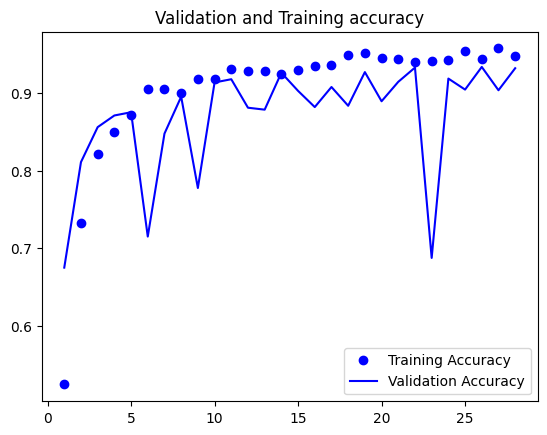

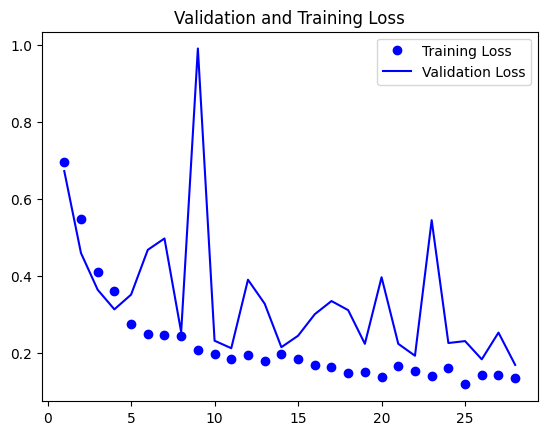

In [77]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1 , len(acc) + 1)

plt.plot(epochs , acc, "bo" , label = "Training Accuracy")
plt.plot(epochs , val_acc , "b" , label = "Validation Accuracy")
plt.title("Validation and Training accuracy")
plt.legend()
plt.figure()

plt.plot(epochs , loss , "bo" , label = "Training Loss")
plt.plot(epochs , val_loss , "b" , label = "Validation Loss")
plt.title("Validation and Training Loss")
plt.legend()

plt.show()

In [19]:
test_generator = train_datagen.flow_from_directory(
    test_dir , target_size = (150,150) , 
    batch_size = 20 , 
    class_mode = "binary"
    )

test_loss , test_acc = model.evaluate(test_generator , steps = 5)
print("Test Accuracy : " , test_acc)

Found 9000 images belonging to 2 classes.
5/5 [==============================] - 0s 42ms/step - loss: 0.0583 - acc: 0.9800
Test Accuracy :  0.9800000190734863


TEST ACCURACY INCREASED

DATA AUGMENTATION AND ADDING DROPOUT

In [20]:
aug_datagen = ImageDataGenerator(rescale=1./255 , 
    rotation_range = 40 , 
    width_shift_range = 0.2 , 
    shear_range = 0.2 , 
    zoom_range = 0.2 , 
    horizontal_flip = True , 
    fill_mode = "nearest"
    )

model = models.Sequential()
model.add(layers.Conv2D(32 , (3,3) , activation="relu" ,input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64 , (3,3) , activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128 , (3,3) , activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128 , (3,3) , activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128 , (3,3) , activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128 , activation = "relu"))
model.add(layers.Dense(64 , activation = "relu"))
model.add(layers.Dense(32 , activation = "relu"))
model.add(layers.Dense(1 , activation = "sigmoid"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 17, 17, 128)      

In [21]:
model.compile(loss = "binary_crossentropy" ,
              optimizer = optimizers.RMSprop(lr=0.001) , 
              metrics = ["acc"])

In [22]:
train_generator = aug_datagen.flow_from_directory(
    train_dir , target_size = (150,150) , 
    batch_size = 20 , class_mode = "binary")

validation_generator = aug_datagen.flow_from_directory(
    validation_dir , target_size = (150,150) ,
    batch_size = 20 , class_mode = "binary" )

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [23]:
for data_batch , labels_batch in train_generator : 
    print("data batch shape : " , data_batch.shape)
    print("labels batch shape : " , labels_batch.shape)
    break

data batch shape :  (20, 150, 150, 3)
labels batch shape :  (20,)


In [24]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=28,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/28


C:\Users\ardac\AppData\Local\Temp\ipykernel_3420\43649630.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 23s 220ms/step - loss: 0.6951 - acc: 0.4985 - val_loss: 0.6886 - val_acc: 0.6330
Epoch 2/28
100/100 [==============================] - 22s 218ms/step - loss: 0.6655 - acc: 0.6180 - val_loss: 0.5051 - val_acc: 0.7830
Epoch 3/28
100/100 [==============================] - 22s 218ms/step - loss: 0.5258 - acc: 0.7560 - val_loss: 0.4266 - val_acc: 0.8440
Epoch 4/28
100/100 [==============================] - 21s 213ms/step - loss: 0.4694 - acc: 0.7950 - val_loss: 0.5445 - val_acc: 0.6980
Epoch 5/28
100/100 [==============================] - 21s 214ms/step - loss: 0.4300 - acc: 0.8315 - val_loss: 0.3202 - val_acc: 0.8700
Epoch 6/28
100/100 [==============================] - 21s 212ms/step - loss: 0.3853 - acc: 0.8430 - val_loss: 0.3216 - val_acc: 0.8590
Epoch 7/28
100/100 [==============================] - 21s 213ms/step - loss: 0.3606 - acc: 0.8585 - val_loss: 0.2463 - val_acc: 0.8880
Epoch 8/28
100/100 [==============================] - 21s 212ms/st

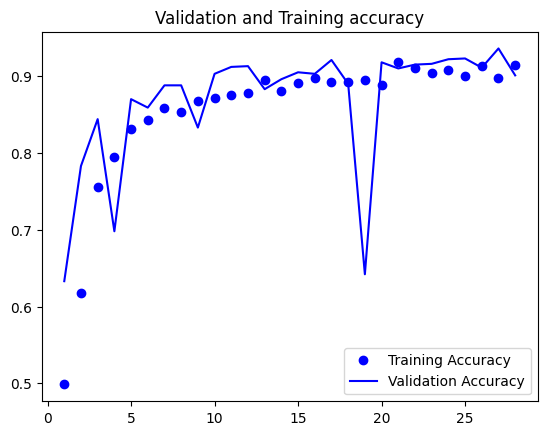

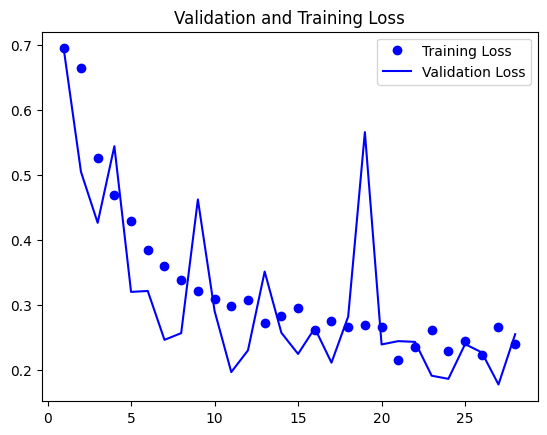

In [25]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1 , len(acc) + 1)

plt.plot(epochs , acc, "bo" , label = "Training Accuracy")
plt.plot(epochs , val_acc , "b" , label = "Validation Accuracy")
plt.title("Validation and Training accuracy")
plt.legend()
plt.figure()

plt.plot(epochs , loss , "bo" , label = "Training Loss")
plt.plot(epochs , val_loss , "b" , label = "Validation Loss")
plt.title("Validation and Training Loss")
plt.legend()

plt.show()

In [50]:
test_generator = train_datagen.flow_from_directory(
    test_dir , target_size = (150,150) , 
    batch_size = 20 , 
    class_mode = "binary"
)

test_loss , test_acc = model.evaluate(test_generator , steps = 5)
print("Test Accuracy : " , test_acc)

Found 9000 images belonging to 2 classes.
5/5 [==============================] - 0s 43ms/step - loss: 0.0602 - acc: 0.9900
Test Accuracy :  0.9900000095367432


USING THE VGG16 PRETRAINED CONVNET

In [51]:
from keras.applications import VGG16

conv_base = VGG16(weights = "imagenet" , 
                  include_top = False , 
                  input_shape = (150 , 150 , 3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [52]:
import numpy as np

datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 20

def extract_features(directory , sample_count) : 
    features = np.zeros(shape = (sample_count , 4 , 4 , 512))
    labels = np.zeros(shape = (sample_count ))
    generator = datagen.flow_from_directory(
        directory , target_size = (150,150) , 
        batch_size = batch_size , 
        class_mode = "binary")
    
    i = 0
    for inputs_batch , labels_batch in generator : 
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1) * batch_size ] = features_batch
        labels[i * batch_size : (i+1) * batch_size ] = labels_batch

        i += 1
        if i * batch_size >= sample_count : 
            break
    return features , labels        

train_features , train_labels = extract_features(train_dir , 10000)
validation_features , validation_labels = extract_features(validation_dir , 2000)
test_features , test_labels = extract_features(test_dir , 9000)

Found 10000 images belonging to 2 classes.
1/1 [==============================] - 1s 548ms/step
Found 2000 images belonging to 2 classes.
1/1 [==============================] - 1s 546ms/step
Found 9000 images belonging to 2 classes.
1/1 [==============================] - 1s 549ms/step


In [53]:
train_features = np.reshape(train_features , (10000 , 4 * 4 * 512))
validation_features = np.reshape(validation_features , (2000 , 4 * 4 * 512))
test_features = np.reshape(test_features , (9000 , 4 * 4 * 512))

model = models.Sequential()
model.add(layers.Dense(256 , activation = "relu" , input_dim = 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128 , activation = "relu"))
model.add(layers.Dense(64 , activation = "relu"))
model.add(layers.Dense(32 , activation = "relu"))
model.add(layers.Dense(1 , activation = "sigmoid"))

In [54]:
model.compile(optimizer = optimizers.RMSprop(lr = 0.001) , 
              loss = "binary_crossentropy" , 
              metrics = ["acc"])


In [55]:
history = model.fit(train_features , train_labels , 
                    epochs = 28 , 
                    batch_size = 20 , 
                    validation_data = (validation_features , validation_labels))

Epoch 1/28
500/500 [==============================] - 6s 12ms/step - loss: 0.3335 - acc: 0.8614 - val_loss: 0.2228 - val_acc: 0.9100
Epoch 2/28
500/500 [==============================] - 6s 11ms/step - loss: 0.2465 - acc: 0.9011 - val_loss: 0.2095 - val_acc: 0.9150
Epoch 3/28
500/500 [==============================] - 6s 11ms/step - loss: 0.2293 - acc: 0.9057 - val_loss: 0.1897 - val_acc: 0.9185
Epoch 4/28
500/500 [==============================] - 6s 11ms/step - loss: 0.2152 - acc: 0.9171 - val_loss: 0.1908 - val_acc: 0.9225
Epoch 5/28
500/500 [==============================] - 6s 11ms/step - loss: 0.2014 - acc: 0.9155 - val_loss: 0.1793 - val_acc: 0.9260
Epoch 6/28
500/500 [==============================] - 6s 11ms/step - loss: 0.1941 - acc: 0.9245 - val_loss: 0.1807 - val_acc: 0.9275
Epoch 7/28
500/500 [==============================] - 6s 11ms/step - loss: 0.1824 - acc: 0.9297 - val_loss: 0.1879 - val_acc: 0.9250
Epoch 8/28
500/500 [==============================] - 6s 11ms/step - 

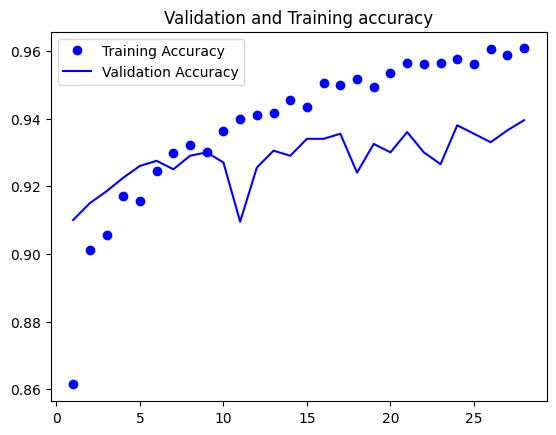

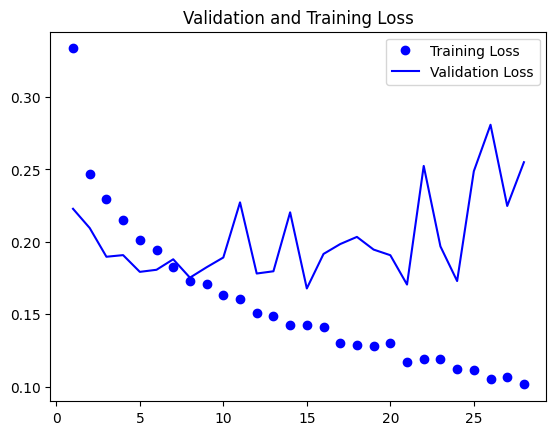

In [56]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1 , len(acc) + 1)

plt.plot(epochs , acc, "bo" , label = "Training Accuracy")
plt.plot(epochs , val_acc , "b" , label = "Validation Accuracy")
plt.title("Validation and Training accuracy")
plt.legend()
plt.figure()

plt.plot(epochs , loss , "bo" , label = "Training Loss")
plt.plot(epochs , val_loss , "b" , label = "Validation Loss")
plt.title("Validation and Training Loss")
plt.legend()

plt.show()

In [93]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_features = test_datagen.flow_from_directory(
    test_dir , target_size = (150,150) , 
    batch_size = 20 , 
    class_mode = "binary"
)

test_loss , test_acc = model.evaluate(test_features , steps = 5)
print("Test Accuracy : " , test_acc)

Found 9000 images belonging to 2 classes.
5/5 [==============================] - 0s 44ms/step - loss: 0.0614 - acc: 0.9900
Test Accuracy :  0.9900000095367432


LOWEST VALIDATION ACCURACY WAS WHEN I USED VGG16 BUT IT GAVE THE HUGHEST PERCENTAGE OF TEST ACCURACY

IF I HAD DONE FINE TUNING MY VALIDATION ACCURACY COULD BE HIGHER

FOR DIFFERENT DATA AUGMENTATION SETTINGS I COULD REACH HIGHER VALIDATION ACCURACY